# Organize data from CSV to PKL

1. Load the CSV file containing P, T and XYZ atributes
2. Filter only the X coordinates for the midpoint along the Z axism i.e. $\approx 0.145$m
3. Build a dict with Time, X coordinates and Pressure.

In [1]:
import numpy as np
import pandas as pd
import pickle 
from os import system

In [2]:
# File paths
FOLDER = "./organizedData_constg"
PFILE = f"{FOLDER}/p.txt"
TFILE = f"{FOLDER}/time.txt"
XFILE = f"{FOLDER}/xyz.txt"

In [3]:
# Load files
X = pd.read_csv(XFILE,sep=" ",names=['X','Y','Z'])
T = pd.read_csv(TFILE,delimiter=" ",header=None)
P = pd.read_csv(PFILE,delimiter=" ",header=None)

In [4]:
# Filter X-Coordinaes by Z-axis
xCoords = pd.DataFrame(X[(X['Z']>0.13) & (X['Z']<0.15)][['X','Y','Z']])
xCoords.head()

,X,Y,Z
7,0.000000,0.000000,0.135333
23,0.003037,0.000495,0.135333
39,0.006063,0.001056,0.135333
55,0.009079,0.001667,0.135333
71,0.012088,0.002313,0.135333


In [5]:
# Filter pressure by the X-coordinates of interest
P_filtered = P[[xi for xi in xCoords.index]]

In [6]:
# Assemble a dict with the T,X and P
fullDict = {"Time":T,"xCoord":xCoords,"P":P_filtered}

In [7]:
# Pickle data
fname = "pickledData_constg/PTX(1).pkl"
with open(fname,'wb') as f: pickle.dump(fullDict,f)

In [8]:
# Save selected coordinates
fname = "cppCodebits_constg/selectedXYZ.csv"
save_dict = dict(fmt='%10.8f',delimiter=" ",newline=" \n ",\
                 header="",footer="",comments='')

np.savetxt(fname,xCoords,**save_dict)
system(f"sed -i 's/^/( /g' {fname}; sed -i 's/$/ )/g' {fname}")

0

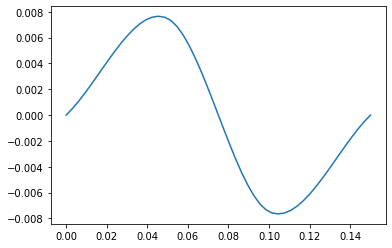

In [9]:
import matplotlib.pyplot as plt
plt.plot(xCoords['X'],xCoords['Y'])
plt.show()